### Documentation:
#### Data Set:2.concerticcir1


### Data Description:

- The dataset consists of three columns and 100 rows which includes two feature columns and one label column.
- Features columns are in the form of float and continuous values ranges from [-1.131849 to 1.129808] and [-1.289427 to 1.073060] and the means are at [-0.010872 and -0.019289].
- Whereas label is in the form discreate numerical float values that includes [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels.
- There are zero duplicates and no null values consists in the dataset.
- Pattern that is formed by the input features is concentrc circles. That means both the circles have common center,one circle consists of labels as 0 and the other consists of 1.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\Deep Learning data\\2.concerticcir1.csv". The dataset is stored in the DataFrame df.

In [3]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\2.concerticcir1.csv",header = None)
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


#### Gives the dimensions of the dataset (number of rows, number of columns).

In [4]:
df.shape

(100, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column.

In [6]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,-0.010872,-0.019289,0.500000
std,0.577796,0.542785,0.502519
min,-1.131849,-1.289427,0.000000
25%,-0.450428,-0.433372,0.000000
50%,-0.030343,-0.030291,0.500000
75%,0.425418,0.420430,1.000000
max,1.129808,1.073060,1.000000


In [7]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

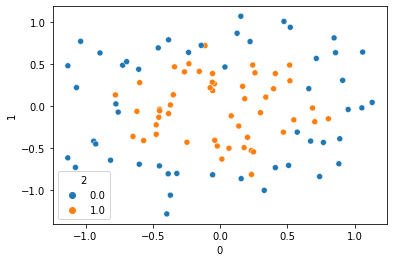

In [10]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 20% of the total dataset.

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains=std.fit_transform(X_train)
X_tests=std.transform(X_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [95]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [110]:
model=Sequential()
model.add(Dense(5,activation="relu",kernel_initializer='he_uniform',input_dim=2))

model.add(Dense(3,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))

### Model Architecture:

- The model is defined as a Sequential model, which is a linear stack of layers.
- The first layer is a Dense layer with 5 units, ReLU activation function, He uniform kernel initializer, and an input dimension of 2.
- The second layer is another Dense layer with 3 units, ReLU activation, and He uniform kernel initializer.
- The last layer is a Dense layer with 1 unit and sigmoid activation function.

### Model Summary:

The summary method is called on the model to display the summary of the model architecture, including the layer type, output shape, and number of parameters.

In [111]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 5)                 15        
                                                                 
 dense_35 (Dense)            (None, 3)                 18        
                                                                 
 dense_36 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Compilation:

The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

In [112]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Model Training:

- The model is trained using the fit method on the training data X_trains and y_train.
- The training is performed for 50 epochs with a batch size of 10 and a validation split of 0.2.

In [113]:
history=model.fit(X_trains,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6812 - accuracy: 0.4444 - val_loss: 0.5973 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.4444 - val_loss: 0.5967 - val_accuracy: 0.5556
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.4444 - val_loss: 0.5966 - val_accuracy: 0.5556
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.4444 - val_loss: 0.5953 - val_accuracy: 0.5556
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.4583 - val_loss: 0.5937 - val_accuracy: 0.5556
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.4583 - val_loss: 0.5910 - val_accuracy: 0.5556
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.4444 - val_loss: 0.5889 - val_accuracy: 0.5556
Epoch 8/50
8/8 [=================

### Decision Regions Plot:

The plot_decision_regions function from the mlxtend.plotting library is used to visualize the decision regions of the model based on the training data.
The plot is displayed using Matplotlib.

In [114]:
from mlxtend.plotting import plot_decision_regions as pt

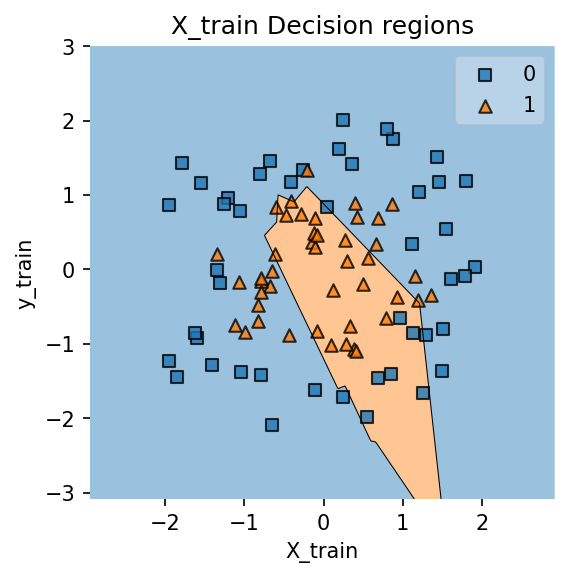

In [115]:
plt.figure(figsize=(4,4),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions")
plt.xlabel("X_train",color='black')
plt.ylabel("y_train",color='black')
plt.show()

### Prediction and Evaluation:

- The model is used to make predictions on the test data X_tests using the predict method.
- The predicted probabilities are converted into binary predictions by setting a threshold of 0.5.


In [116]:
y_pred=model.predict(X_tests)

In [117]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

#### The accuracy of the model is calculated using the accuracy_score function from sklearn.metrics, comparing the predicted labels y_predf with the actual labels y_test.

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.7

### Loss Plot:

A plot is created to visualize the training loss and validation loss over the epochs.


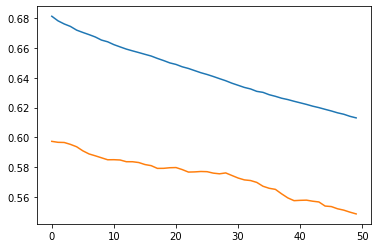

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Test Data Decision Regions Plot:

- Similar to the training data decision regions plot, the plot_decision_regions function is used to visualize the decision regions of the model based on the test data.
- The plot is displayed using Matplotlib.

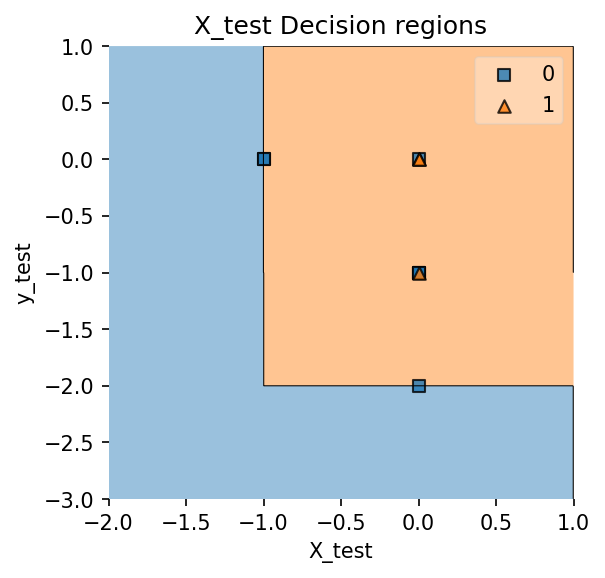

In [120]:
plt.figure(figsize=(4,4),dpi=150)
pt(X_tests.astype(int),y_predf,clf=model)
plt.title("X_test Decision regions")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()